<a href="https://colab.research.google.com/github/alanmejiaa/Procesamiento-y-Clasificacion-de-Datos/blob/main/Practica%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practica 4**

Hacer un ejercicio para encontrar correlaciones en sus
datos. Pueden utilizar los ejemplos de los links. Explicar sus hallazgos.

Importamos librerias necesarias

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Cargamos la base de datos a trabajar

In [32]:
df = pd.read_csv('train.csv')

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Nuestras variables:


*   **PassengerId:** Id de cada pasajero
*   **Survived:** El pasajero sobrevivio (1) o No sobrevivio (0)
*   **Pclass:** Clase en la que estaba abordo el pasajero
*   **Name:** Nombre del pasajero
*   **SSex:** Sexo del pasajero
*   **Age:** Edad del pasajero
*   **SibSp:** Numero de hermanos o conyuges abordo por pasajero
*   **Parch:** Numero de padres o hijos abordo por pasajero
*   **Ticket:** Identificador de cada ticket
*   **Fare:** Precio del ticket
*   **Cabin:** Cabina en la que dormian
*   **Embarked:** Embarque al que pertenecian

Cambiamos la variable del sexo, por valores numericos:
Masculino 1 y Femenino 0

In [34]:
sex_mapping = {'male': 1, 'female': 0}
df['Sex'] = df['Sex'].map(sex_mapping)

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df['Sex'] = df['Sex'].astype(int)

Eliminamos variables que no son de tipo numerico y que no son relevantes para el analisis

In [36]:
df.drop(['PassengerId','Name','Embarked','SibSp','Ticket','Parch','Fare'],axis=1,inplace=True)

In [37]:
correlation_matrix = df.corr(method='pearson')

<ipython-input-37-2663855e16a0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


In [38]:
print(correlation_matrix)

          Survived    Pclass       Sex       Age
Survived  1.000000 -0.338481 -0.543351 -0.077221
Pclass   -0.338481  1.000000  0.131900 -0.369226
Sex      -0.543351  0.131900  1.000000  0.093254
Age      -0.077221 -0.369226  0.093254  1.000000


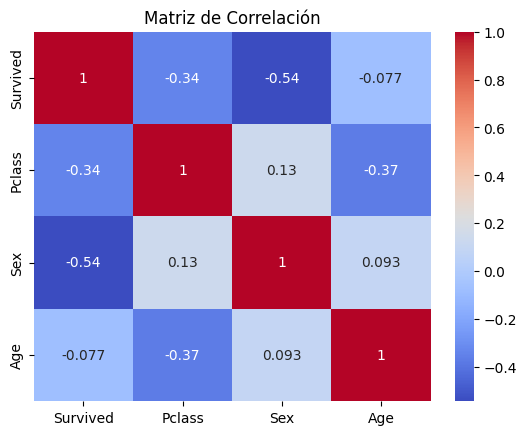

In [39]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

**Survived - Pclass:**

* Correlación: -0.34
* Interpretación: Correlación negativa moderada. Esto significa que, en general, a medida que la clase tiende a ser mas pobre (3), la probabilidad de supervivencia tiende a disminuir, y viceversa.

**Survived - Sex:**

* Correlación: -0.54
* Interpretación: Correlación negativa moderada. Esto implica que hay una tendencia en la que a medida que la edad aumenta (o se acerca al género masculino), la probabilidad de sobrevivir tiende a disminuir.

**ApplicantIncome vs Age:**

* Correlación: -0.07
* Interpretación: Correlación negativa muy débil. Esto sugiere que hay una tendencia, aunque débil, en la que a medida que la edad aumenta, la probabilidad de sobrevivir tiende a disminuir ligeramente.

**Pclass - Sex:**

* Correlación: 0.13
* Interpretación: Correlación positiva muy débil. Esto implica que hay una tendencia, aunque débil, en la que a medida que la clase socioeconómica aumenta (de baja a alta), la proporción de individuos masculinos tiende a aumentar ligeramente.

**Pclass - Age:**

* Correlación: -0.37
* Interpretación: Correlación negativa moderada. Esto implica que hay una tendencia en la que, a medida que la clase socioeconómica aumenta (de baja a alta), la edad tiende a disminuir.

**Sex - Age:**

* Correlación: 0.09
* Interpretación: Correlación positiva muy débil. Esto implica que hay una tendencia, aunque débil, en la que a medida que la edad aumenta, la proporción de individuos masculinos tiende a aumentar ligeramente.

<Axes: xlabel='Age', ylabel='Survived'>

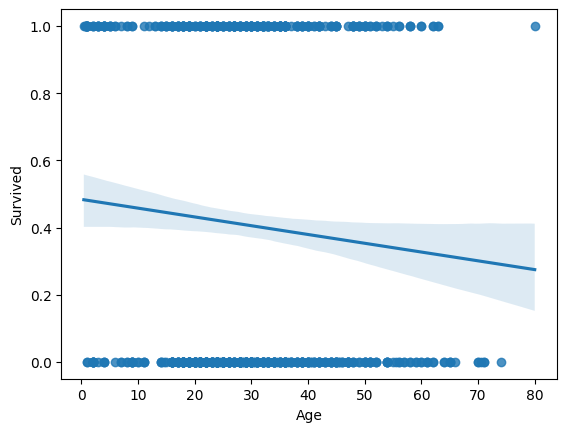

In [42]:
sns.regplot(x = df['Age'], y = df['Survived'], data = df)

La tendencia que vemos es que cuando nos aproximamos a 0 (Muerte - No sobrevivio), la edad aumenta como lo mencionamos en las correlaciones anteriores.